In [70]:
import numpy as np 
import pandas as pd 

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [6]:
train_df = pd.read_csv("MNIST_sign_language/sign_mnist_train.csv")
test_df = pd.read_csv("MNIST_sign_language/sign_mnist_test.csv")

In [158]:
# MY TEST
test_df = model_ready_image
test = model_ready_image.copy()
y = test[0]
#__________________

In [ ]:
# ORIGINAL
test = pd.read_csv("MNIST_sign_language/sign_mnist_test.csv")
y = test['label']

In [8]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [159]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

KeyError: 'label'

In [10]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [12]:
x_train = train_df.values
x_test = test_df.values

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

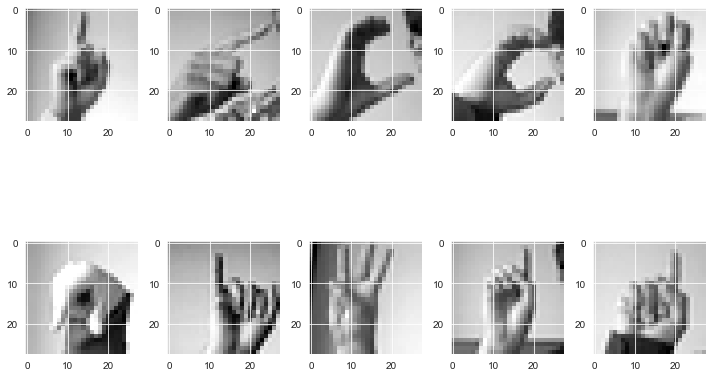

In [15]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [18]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [19]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 88s 315ms/step - loss: 1.8330 - accuracy: 0.4592 - val_loss: 3.3700 - val_accuracy: 0.1004
Epoch 2/20
215/215 [==============================] - 66s 305ms/step - loss: 0.2619 - accuracy: 0.9150 - val_loss: 1.3005 - val_accuracy: 0.5633
Epoch 3/20
215/215 [==============================] - 67s 310ms/step - loss: 0.1151 - accuracy: 0.9615 - val_loss: 0.1874 - val_accuracy: 0.9406
Epoch 4/20
215/215 [==============================] - 67s 312ms/step - loss: 0.0612 - accuracy: 0.9801 - val_loss: 0.0342 - val_accuracy: 0.9907
Epoch 5/20
215/215 [==============================] - 68s 315ms/step - loss: 0.0509 - accuracy: 0.9834 - val_loss: 0.0196 - val_accuracy: 0.9944
Epoch 6/20
215/215 [==============================] - 68s 317ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 7/20
215/215 [==============================] - 67s 310ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0304 - val_ac

In [20]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 21ms/step - loss: 5.8211e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


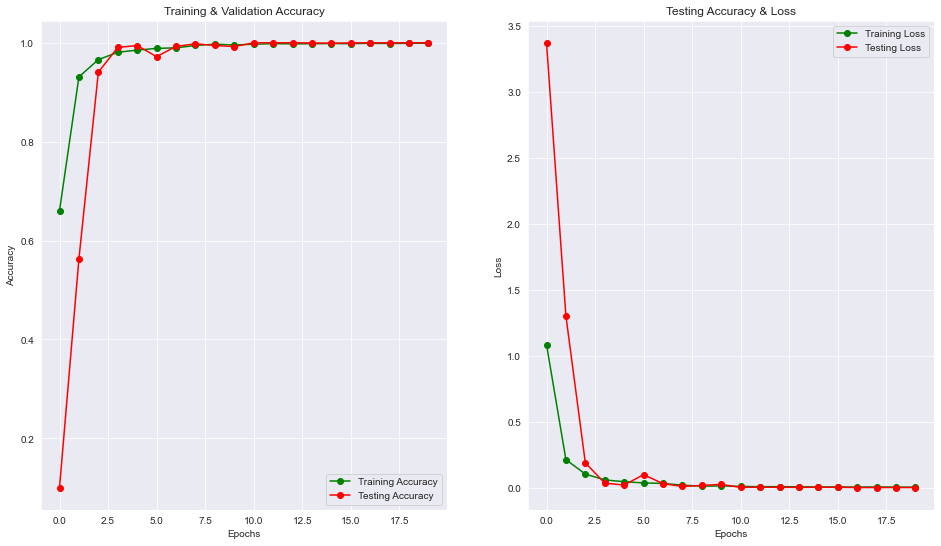

In [21]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
#====TESTING====

In [113]:
import cv2
from PIL import Image, ImageOps

In [114]:
#______CV IMAGE________
cv_image = cv2.imread('personal_test_photos/Cropped_A.jpg')

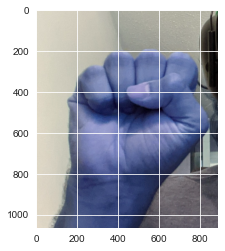

In [115]:
plt.imshow(cv_image)

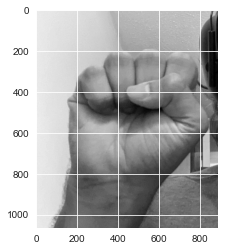

In [116]:
grey_image_cv = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image_cv, 'gray')

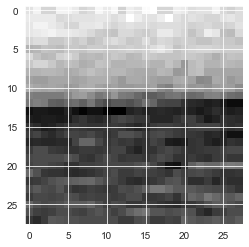

In [117]:
grey_image_cv_resize = np.resize(grey_image_cv, (28,28))
plt.imshow(grey_image_cv_resize, 'gray')

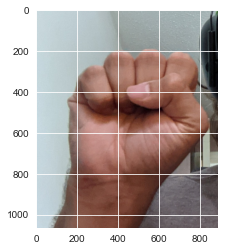

In [121]:
#______PIL Image_______
single_image = Image.open('personal_test_photos/Cropped_A.jpg')
plt.imshow(single_image)

In [139]:
# my_x_test = single_image
# my_x_test = my_x_test / 255
# my_x_test = my_x_test.reshape(-1,28,28,1)

TypeError: unsupported operand type(s) for /: 'JpegImageFile' and 'int'

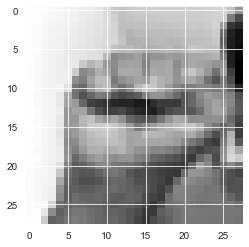

In [119]:
load_img_rz = np.array(single_image.resize((28,28)))
load_img_rz = Image.fromarray(load_img_rz)

grey_img_rz = ImageOps.grayscale(load_img_rz) #USE this for the model?

plt.imshow(grey_img_rz, 'gray')

In [124]:
#convert PIL to CV format
open_cv_image = np.array(grey_img_rz)
open_cv_image = open_cv_image[:, ::-1].copy()

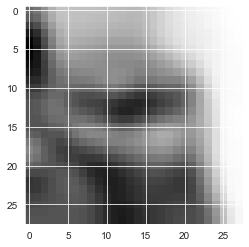

In [127]:
blur = cv2.GaussianBlur(open_cv_image, (5, 5), 2) # Too much detail lost?
plt.imshow(blur, 'gray')

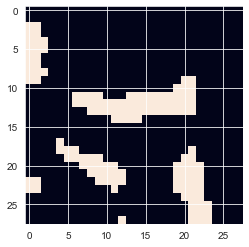

In [131]:
thresh_hold_image = cv2.adaptiveThreshold(blur, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 10)
plt.imshow(thresh_hold_image)

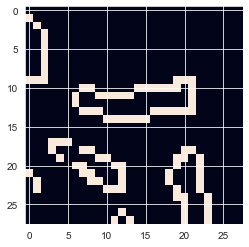

In [132]:
cannyed = cv2.Canny(thresh_hold_image, 100, 200)
plt.imshow(cannyed)

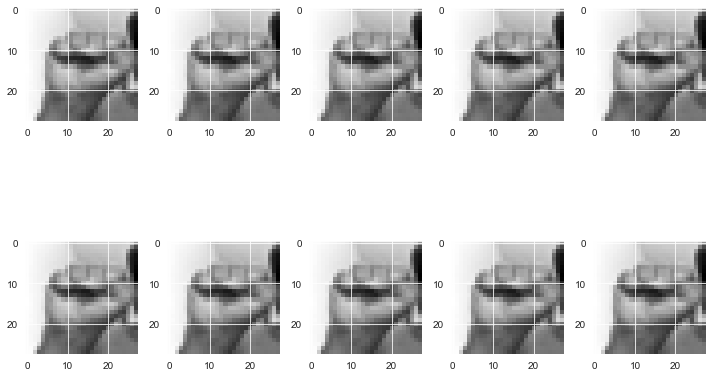

In [133]:
# TEST PHOTO
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(grey_img_rz , cmap = "gray")
        k += 1
    plt.tight_layout()

In [146]:
# Convert PIL to numpy array
image_to_numpy = np.array(grey_img_rz)

In [147]:
model_ready_image = pd.DataFrame(image_to_numpy)

In [149]:
my_x_test = model_ready_image.values
my_x_test = my_x_test / 255
my_x_test = my_x_test.reshape(-1,28,28,1)

In [152]:
# TEST PHOTOS
predictions = model.predict_classes(model_ready_image)
predictions
# for i in range(len(predictions)):
#     if(predictions[i] >= 9):
#         predictions[i] += 1
# predictions[:5] 

C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: in user code:

    C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\input_spec.py:227 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 28)


In [ ]:
#====END====

In [22]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]  

C:\Users\joshb\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3], dtype=int64)

In [23]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [24]:
cm = confusion_matrix(y,predictions)

In [25]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

<AxesSubplot:>

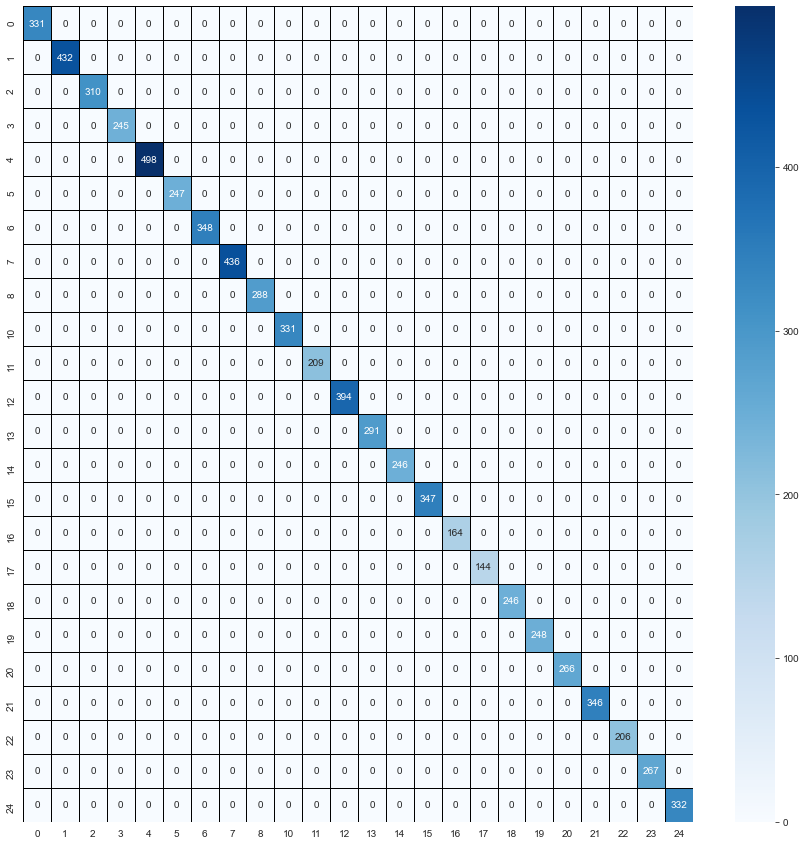

In [26]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [30]:
#correct = np.nonzero(predictions == y)[0]

In [29]:
# i = 0
# for c in correct[:6]:
#     plt.subplot(3,2,i+1)
#     plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
#     plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
#     plt.tight_layout()
#     i += 1